

# Lab 2 Project (Titanic)
**Author:** Elom Gbogbo 

**Date:** March 21, 2025

**Objective:** Predict passenger survival on the Titanic by building a classification model using key features such as class, gender, and age.



## Introduction
This project analyzes the Titanic dataset using Seaborn to predict passenger survival based on features like class, gender, and age. We’ll clean the data, train a classification model, and explore techniques to improve its performance.


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [928]:


# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier





## Section 1. Import and Inspect the Data

### Load the Titanic dataset and inspect the data




In [929]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


## Section 2. Data Exploration and Preparation



### 2.1 Handle Missing Values and Clean Data

In [930]:
# Impute missing values for age using the median:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())


In [931]:

# Impute missing values for embark_town (or fill with mode)
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


### 2.2 Feature Engineering

In [932]:
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [933]:
# Convert categorical data to numeric:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [934]:
# Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

Reflection 2.3

1) Why might family size be a useful feature for predicting survival? I think that small family sizes may have had a better chance of survival compared to larger family sizes.

2) Why convert categorical data to numeric? It will make it easier for machine learning and to recognize patterns in algorithms. 


## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

First: 

- input features: alone
- target: survived

Second:

- input features - age
- target: survived

Third:
- input features - age and family_size
- target: survived




### 3.2 Define X and y
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series


In [ ]:
# Case #1: alone only
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only (or your choice)
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size (or your choice)
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

Reflection 3: 

Why are these features selected? These features were selected because they have significant influence to survival.

Are there any features that are likely to be highly predictive of survival? I believe that age, and family size will be highly predictive of survival. 

## Section 4. Train a Classification Model (Decision Tree) - Case #1

### 4.1 Split the Data 

Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.



In [936]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X1.iloc[train_indices]
    X_test = X1.iloc[test_indices]
    y_train = y1.iloc[train_indices]
    y_test = y1.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

In [937]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [938]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



Evaluate model performance on test data:

In [939]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:


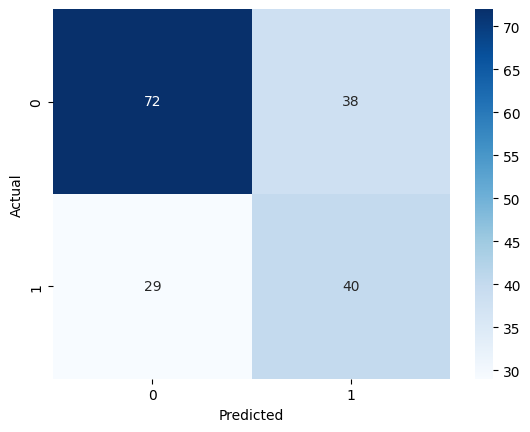

In [940]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.



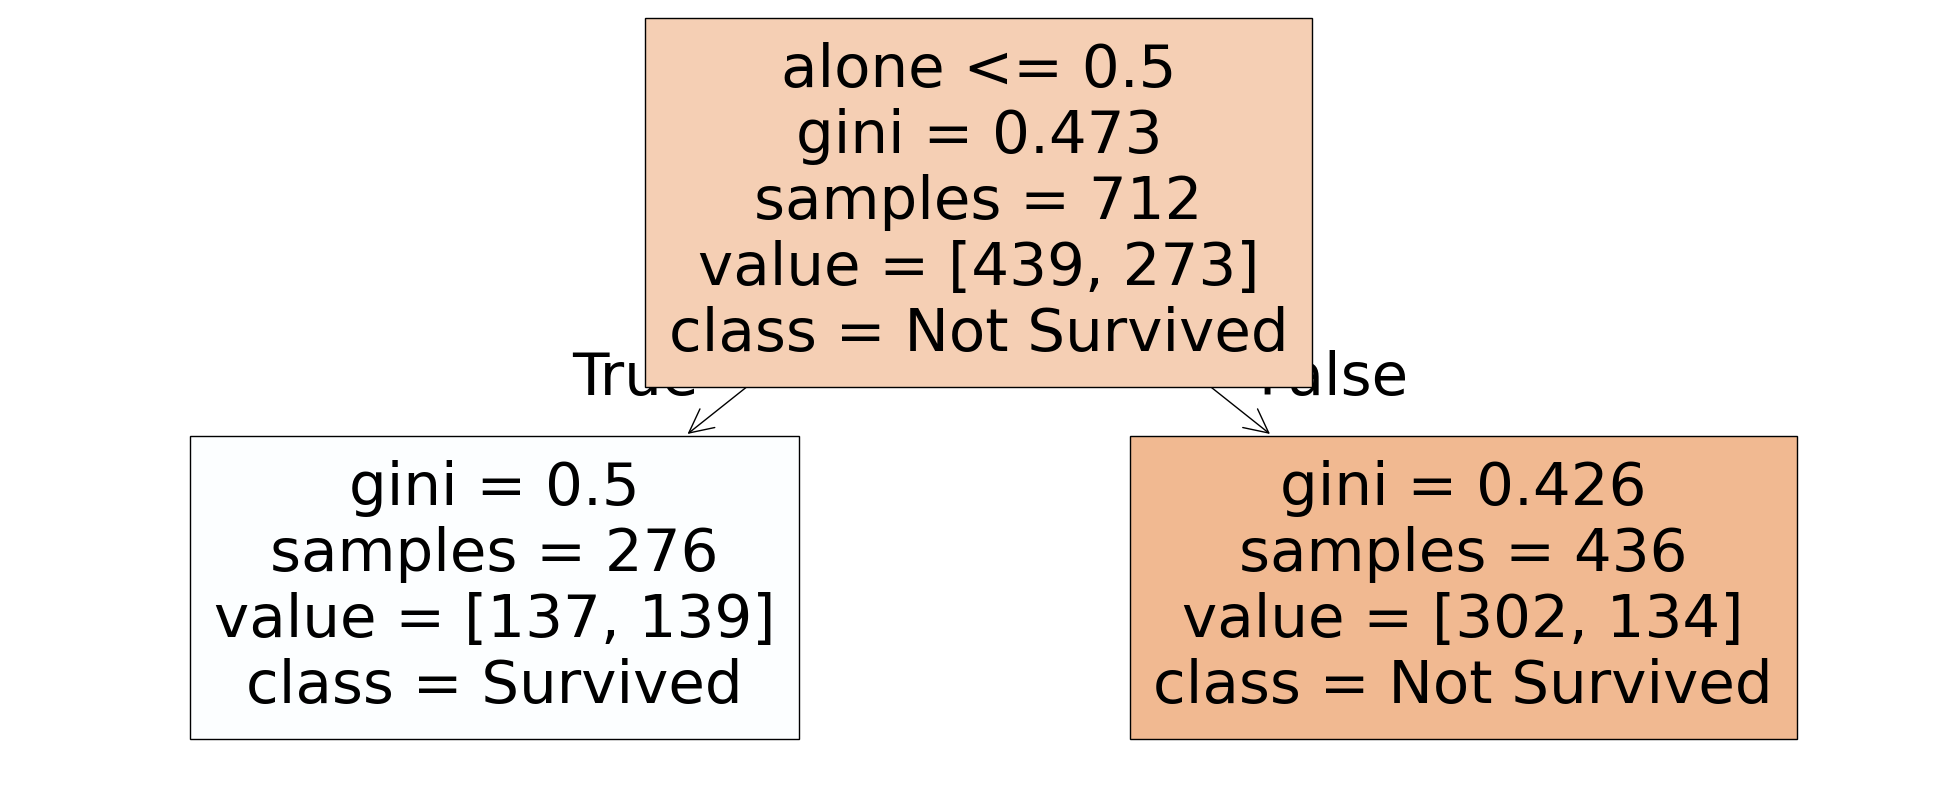

In [941]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic1.png")

## Section 4. Train a Classification Model (Decision Tree) - Case #2

### 4.1 Split the Data 

Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [942]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

In [943]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [944]:
# Predict and evaluate training data (X train)
y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



Evaluate model performance on test data:

In [945]:
# Predict and evaluate test data
y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:

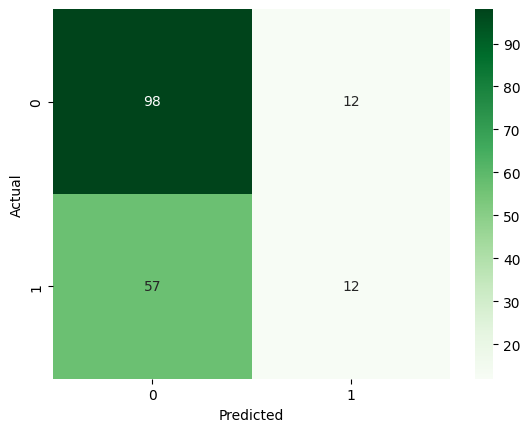

In [946]:
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

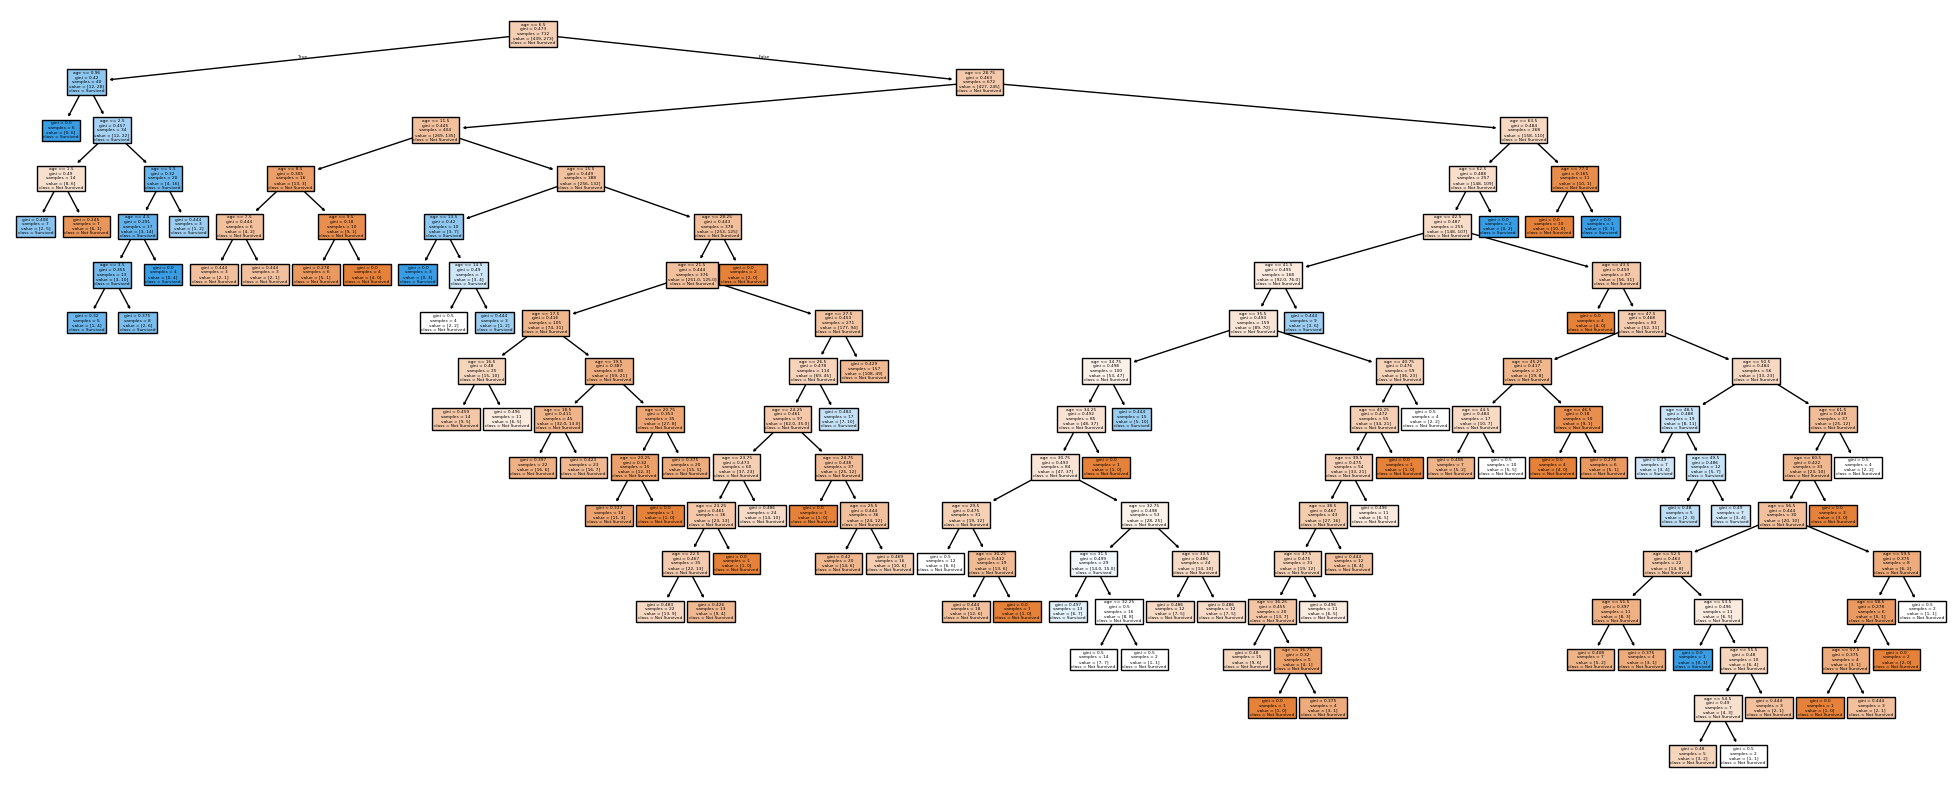

In [947]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic2.png")

## Section 4. Train a Classification Model (Decision Tree) - Case #3

### 4.1 Split the Data 

Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [948]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

In [949]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [950]:
# Predict and evaluate training data (X train)
y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



Evaluate model performance on test data:

In [951]:
# Predict and evaluate test data
y3_test_pred = tree_model.predict(X3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:

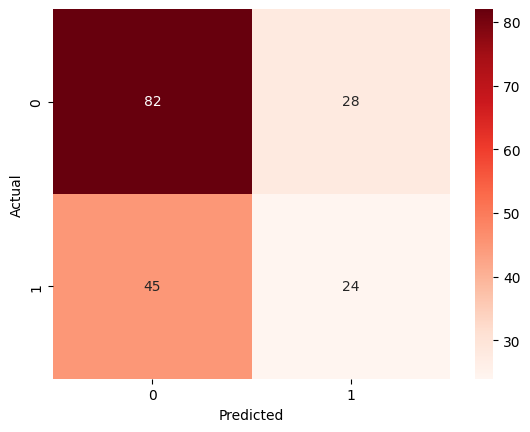

In [952]:
cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

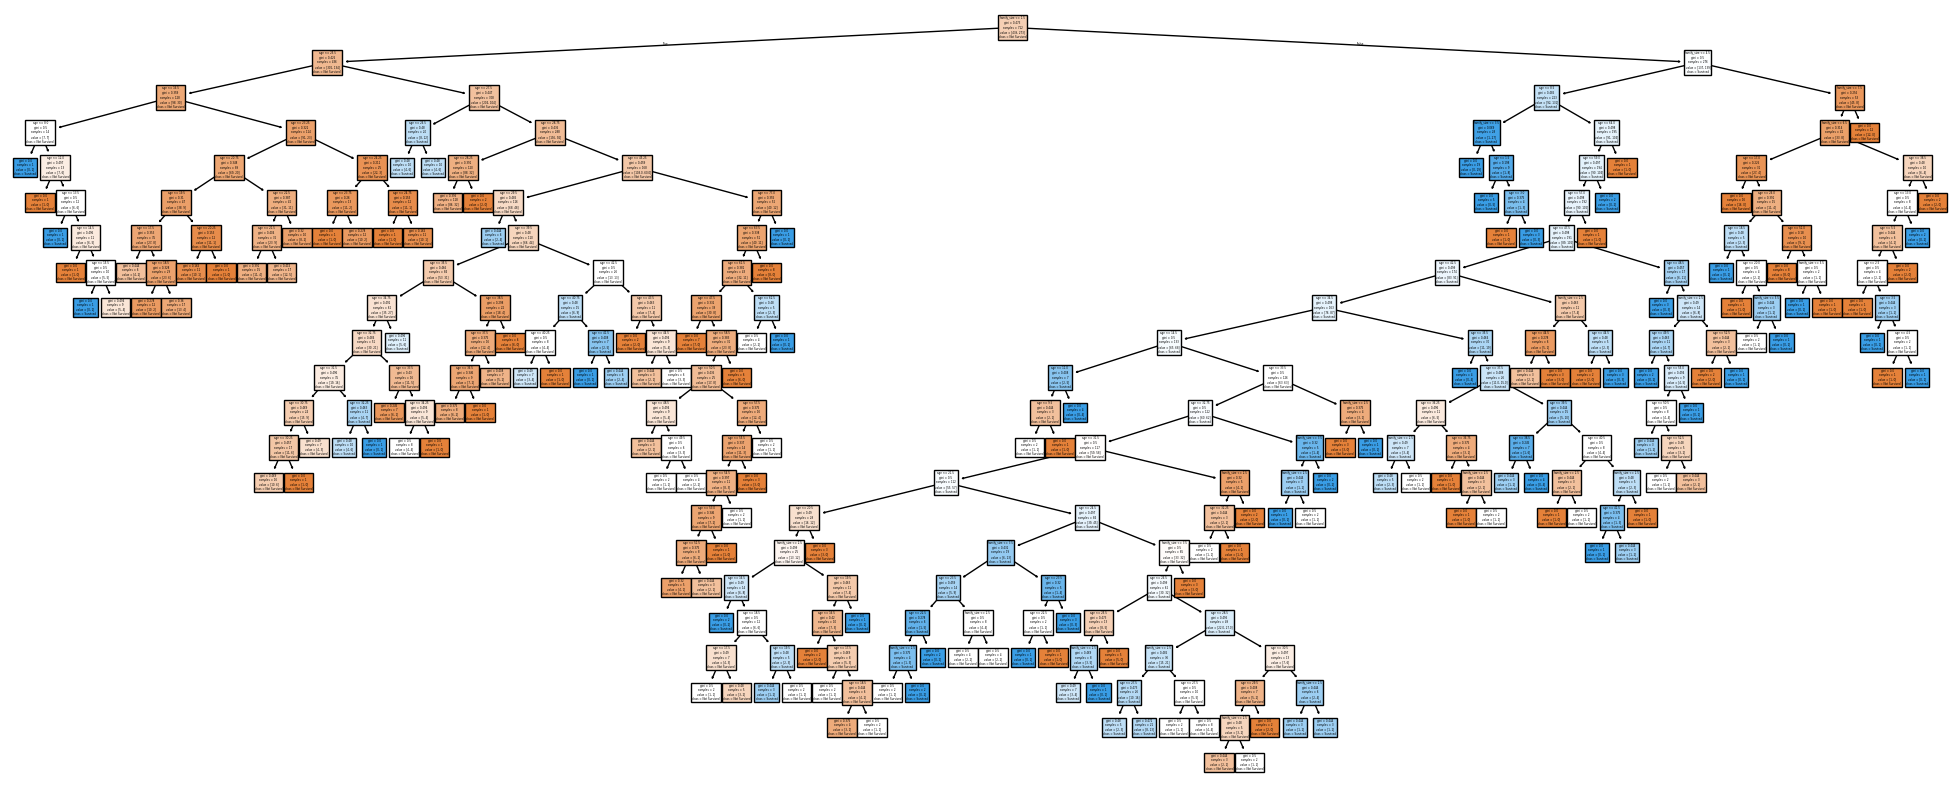

In [953]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic3.png")

Reflection 4:

How well did the different cases perform?
- Case 1: 63% accuracy
- Case 2: 61% accuracy
- Case 3: 59% accuracy

Are there any surprising results?
The family size + age had lower accuracy than expected.

Which inputs worked better? 
- Alone worked better than the rest of the inputs

### Section 5. Compare Alternative Models (SVC, NN)

In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types:

- RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
- Linear – Best for linearly separable data (straight line separation)
- Polynomial – Useful when the data follows a curved pattern
- Sigmoid – Similar to a neural network activation function; less common

In [954]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
#svc_model = SVC(kernel='poly', degree=3)
#svc_model.fit(X_train, y_train)

# Sigmoid Kernel
#svc_model = SVC(kernel='sigmoid')
#svc_model.fit(X_train, y_train)

SVC()

### 5.1 Train and Evaluate Model (SVC)

First, train an SVC model using the default kernel.



In [955]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Predict and evaluate the SVC model:



In [956]:
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



Visualize Support Vectors

Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.

Step-by-Step Process:

1) Split the data into two groups:

- Survived – Passengers who survived the Titanic sinking (value = 1).
- Not Survived – Passengers who did not survive (value = 0).

2) Create a scatter plot of these two groups using different colors and markers:

- Yellow squares ('s') for survived passengers
- Cyan triangles ('^') for non-survived passengers

3) Overlay the support vectors on top of the plot:

- Black pluses ('+') will represent the support vectors.
- Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

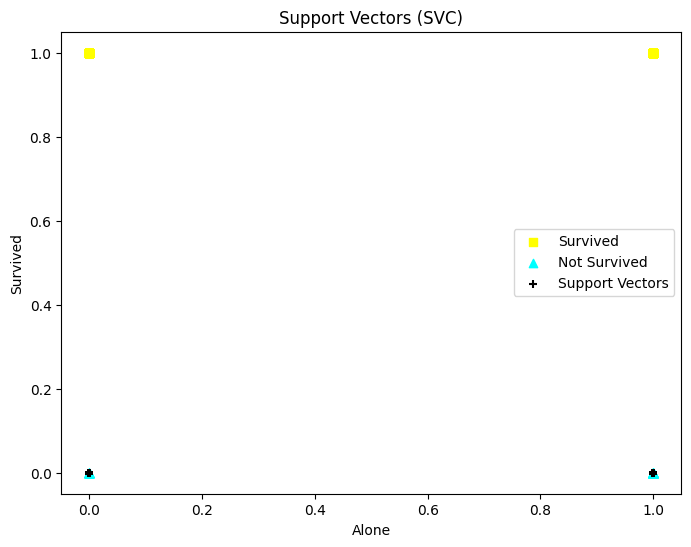

In [957]:

import matplotlib.pyplot as plt

# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)

    # Plot support vectors slightly above the 0-1 survival range
    plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()


5.2 Train and Evaluate Model (NN MLP)

Now we'll use the NN (Multi Level Perceptron ) model. Again, we will give the neural net as much information as possible and understand that it could overfit on the extra data.

We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

Train a neural network model:

Case 1

In [958]:
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

Predict and evaluate Neural Network model:



In [959]:
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



Plot confusion matrix:



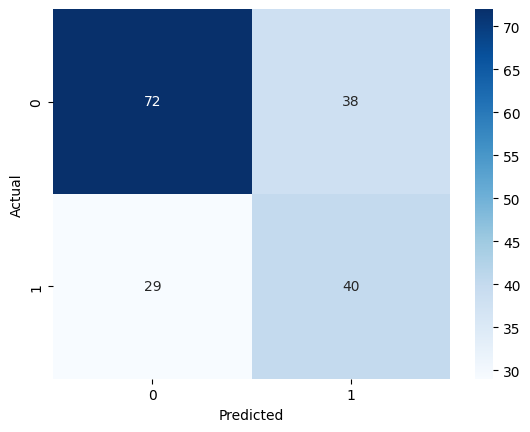

In [960]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

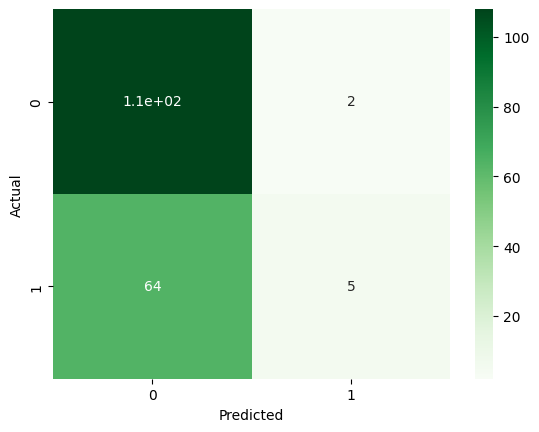

In [961]:
cm_nn = confusion_matrix(y2_test, y2_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

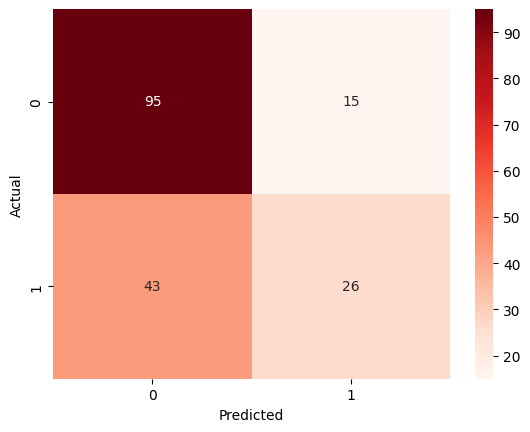

In [962]:
cm_nn = confusion_matrix(y3_test, y3_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Reflection 5:

How well did each model perform?

- The RBF Kernel Model had 63%, 63% and 68% accuracy for Case 1, 2, 3 respectively. (I was able to test it but received errors when trying to clear up some of the code.)

Are there any surprising results?

- No, I do believe that the decision tree performed better.

Why might one model outperform the others?

- Based off the type of data and how much data is present, models can perform better with the amount of data that is given compared to others. 

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                   | Case 2 | age | 61% | 58% | 61% | 55% | - |
|                   | Case 3 | age + family_size | 59% | 58% | 59% | 59% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                   

### Section 6. Final Thoughts and Insights

6.1 Summarize Findings
What indicators are strong predictors of gender? - I think that sex and age are strong predictors. 

Decision Tree performed well but overfit slightly on training data.

Neural Network showed moderate improvement but introduced complexity.

6.2 Discuss Challenges Faced

Small sample size could limit generalizability.

Missing values (if any) could bias the model.
- I faced many challenges with this lab. I was unable to run it successfully without changing some things. I was unable to run multiple tests for Section 5 because of missing values even though I had execute that step earlier in the lab. Because of this, there could be some bias or mistakes in the model.
  
6.3 Next Steps

Test more features (e.g., BMI class).

Try hyperparameter tuning for better results.